In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(37.20536207467545, -31.25091031967861),
 (52.079683356200974, 103.23790987940129),
 (-66.30037831871024, 177.3609710206672),
 (55.448193957020464, 81.49842463887438),
 (81.70587738029158, 71.17611493650642),
 (13.167398719447704, -155.72568718334944),
 (65.75485275385799, -175.3384024432703),
 (10.703409521564978, -179.5549890233908),
 (-74.01240922484564, 120.99410184993656),
 (38.09748868455807, -86.48633396053327),
 (-11.05876470659193, 69.91596780101565),
 (-46.629884015170845, -6.453779946163991),
 (76.6067138143716, -87.96601384626348),
 (76.86746027507974, 52.884907470437525),
 (-26.573010585716005, -145.97660323568044),
 (-60.18628958582089, -94.39456947303238),
 (36.869887219008106, -1.5603504833688078),
 (-16.971336304918836, -148.75640248721265),
 (49.24622475532084, -178.17147682241833),
 (-1.1332961391820646, -66.48750868584641),
 (-79.34949445416629, -76.5200197800371),
 (-27.82997271289225, -74.01471205659843),
 (-71.60272916721772, 104.20888808050847),
 (-33.286253396

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

619

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a10ec51f53fab2eb780ceb0558541a08


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ribeira grande
Processing Record 2 of Set 1 | kultuk
Processing Record 3 of Set 1 | kaitangata
Processing Record 4 of Set 1 | chulym
Processing Record 5 of Set 1 | dikson
Processing Record 6 of Set 1 | hilo
Processing Record 7 of Set 1 | provideniya
Processing Record 8 of Set 1 | kapaa
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | jasper
Processing Record 11 of Set 1 | hithadhoo
Processing Record 12 of Set 1 | cape town
Processing Record 13 of Set 1 | qaanaaq
Processing Record 14 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 15 of Set 1 | mataura
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | aguilas
Processing Record 18 of Set 1 | tiarei
Processing Record 19 of Set 1 | sao gabriel da cachoeira
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | vallenar
Processing Record 22 of Set 1 | port macquari

Processing Record 37 of Set 4 | klaksvik
Processing Record 38 of Set 4 | sorvag
City not found. Skipping...
Processing Record 39 of Set 4 | byron bay
Processing Record 40 of Set 4 | hede
Processing Record 41 of Set 4 | beringovskiy
Processing Record 42 of Set 4 | vardo
Processing Record 43 of Set 4 | bintulu
Processing Record 44 of Set 4 | yamandu
Processing Record 45 of Set 4 | vaitape
Processing Record 46 of Set 4 | luau
Processing Record 47 of Set 4 | san patricio
Processing Record 48 of Set 4 | panzhihua
Processing Record 49 of Set 4 | katsuura
Processing Record 50 of Set 4 | mount isa
Processing Record 1 of Set 5 | severo-kurilsk
Processing Record 2 of Set 5 | xining
Processing Record 3 of Set 5 | cerrito
Processing Record 4 of Set 5 | apatou
Processing Record 5 of Set 5 | rio gallegos
Processing Record 6 of Set 5 | san cristobal
Processing Record 7 of Set 5 | fort-shevchenko
Processing Record 8 of Set 5 | ornskoldsvik
Processing Record 9 of Set 5 | zagare
Processing Record 10 of 

Processing Record 30 of Set 8 | posse
Processing Record 31 of Set 8 | margate
Processing Record 32 of Set 8 | oparino
Processing Record 33 of Set 8 | burica
City not found. Skipping...
Processing Record 34 of Set 8 | rio grande
Processing Record 35 of Set 8 | doume
Processing Record 36 of Set 8 | wanning
Processing Record 37 of Set 8 | khandyga
Processing Record 38 of Set 8 | roald
Processing Record 39 of Set 8 | pingdu
Processing Record 40 of Set 8 | xuddur
Processing Record 41 of Set 8 | sylacauga
Processing Record 42 of Set 8 | seminole
Processing Record 43 of Set 8 | novo aripuana
Processing Record 44 of Set 8 | sur
Processing Record 45 of Set 8 | ileza
Processing Record 46 of Set 8 | tiksi
Processing Record 47 of Set 8 | umm durman
City not found. Skipping...
Processing Record 48 of Set 8 | vila velha
Processing Record 49 of Set 8 | batagay-alyta
Processing Record 50 of Set 8 | marawi
Processing Record 1 of Set 9 | marsa matruh
Processing Record 2 of Set 9 | vanimo
Processing Reco

Processing Record 21 of Set 12 | markha
Processing Record 22 of Set 12 | dwarka
Processing Record 23 of Set 12 | goure
Processing Record 24 of Set 12 | brooks
Processing Record 25 of Set 12 | vostok
Processing Record 26 of Set 12 | vidim
Processing Record 27 of Set 12 | halalo
City not found. Skipping...
Processing Record 28 of Set 12 | sucre
Processing Record 29 of Set 12 | bonnyville
Processing Record 30 of Set 12 | inhambane
Processing Record 31 of Set 12 | katsiveli
City not found. Skipping...
Processing Record 32 of Set 12 | ahipara
Processing Record 33 of Set 12 | tandil
Processing Record 34 of Set 12 | tupelo
Processing Record 35 of Set 12 | karasburg
Processing Record 36 of Set 12 | tefe
Processing Record 37 of Set 12 | boundiali
Processing Record 38 of Set 12 | mala
Processing Record 39 of Set 12 | oktyabrskiy
Processing Record 40 of Set 12 | ambulu
Processing Record 41 of Set 12 | puerto leguizamo
Processing Record 42 of Set 12 | ohangaron
Processing Record 43 of Set 12 | kra

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ribeira Grande,38.5167,-28.7000,75.60,57,40,14.97,PT,2021-08-07 16:03:05
1,Kultuk,51.7208,103.6956,59.81,88,92,6.40,RU,2021-08-07 16:03:05
2,Kaitangata,-46.2817,169.8464,37.00,92,100,5.44,NZ,2021-08-07 16:02:10
3,Chulym,55.0997,80.9572,62.37,85,25,3.38,RU,2021-08-07 16:03:06
4,Dikson,73.5069,80.5464,49.64,70,13,9.71,RU,2021-08-07 15:58:51
5,Hilo,19.7297,-155.0900,73.13,90,90,5.75,US,2021-08-07 16:03:06
6,Provideniya,64.3833,-173.3000,43.90,86,100,4.79,RU,2021-08-07 16:03:07
7,Kapaa,22.0752,-159.3190,79.12,76,75,1.01,US,2021-08-07 16:03:07
8,Albany,42.6001,-73.9662,85.80,70,100,2.62,US,2021-08-07 16:01:30
9,Jasper,37.2001,-94.3502,85.82,63,20,4.00,US,2021-08-07 16:03:07


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
new_city_data_df = city_data_df[new_column_order]
new_city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ribeira Grande,PT,2021-08-07 16:03:05,38.5167,-28.7000,75.60,57,40,14.97
1,Kultuk,RU,2021-08-07 16:03:05,51.7208,103.6956,59.81,88,92,6.40
2,Kaitangata,NZ,2021-08-07 16:02:10,-46.2817,169.8464,37.00,92,100,5.44
3,Chulym,RU,2021-08-07 16:03:06,55.0997,80.9572,62.37,85,25,3.38
4,Dikson,RU,2021-08-07 15:58:51,73.5069,80.5464,49.64,70,13,9.71
5,Hilo,US,2021-08-07 16:03:06,19.7297,-155.0900,73.13,90,90,5.75
6,Provideniya,RU,2021-08-07 16:03:07,64.3833,-173.3000,43.90,86,100,4.79
7,Kapaa,US,2021-08-07 16:03:07,22.0752,-159.3190,79.12,76,75,1.01
8,Albany,US,2021-08-07 16:01:30,42.6001,-73.9662,85.80,70,100,2.62
9,Jasper,US,2021-08-07 16:03:07,37.2001,-94.3502,85.82,63,20,4.00


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

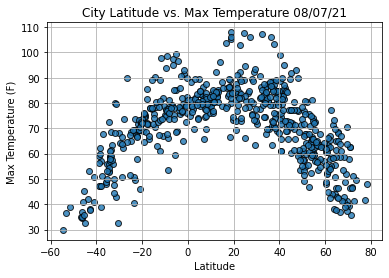

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

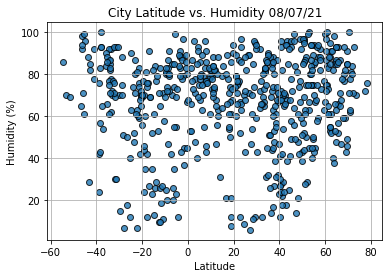

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

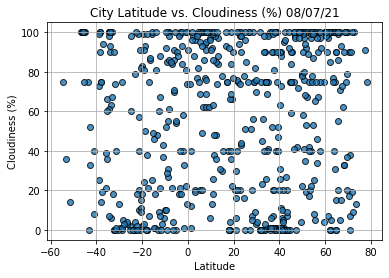

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

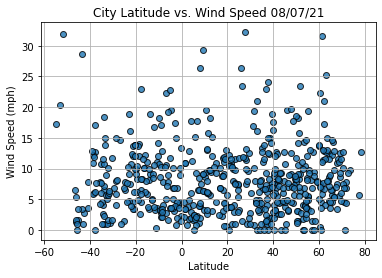

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()